<a href="https://colab.research.google.com/github/raohxxx/TelecomX_Challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción
###carga de datos desde la web

In [50]:
import pandas as pd
import requests

# Leer JSON desde la URL
url3 = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
url1='https://raw.githubusercontent.com/raohxxx/TelecomX_Challenge/refs/heads/main/TelecomX_Data.json'
response = requests.get(url1)
datos_json = response.json()

# Crear DataFrame original
df_original = pd.DataFrame(datos_json)

# Columnas a normalizar
cols_a_normalizar = ['customer', 'phone', 'internet', 'account']

# Diccionario para guardar DataFrames normalizados
dfs_normalizados = {}

for col in cols_a_normalizar:
    if col in df_original.columns:
        df_norm = pd.json_normalize(df_original[col])
        df_norm.columns = [f"{col}_{subcol}" for subcol in df_norm.columns]
        dfs_normalizados[col] = df_norm
    else:
        print(f"⚠️ Columna '{col}' no encontrada en el DataFrame original")

# Concatenar DataFrames normalizados
df_final = pd.concat(dfs_normalizados.values(), axis=1)

# Agregar columnas customerID y churn
for col in ['customerID', 'Churn']:
    if col in df_original.columns:
        df_final[col] = df_original[col]
    else:
        print(f"⚠️ Columna '{col}' no encontrada en el DataFrame original")

# Reordenar columnas: customerID y churn al inicio
columnas = ['customerID', 'Churn'] + [col for col in df_final.columns if col not in ['customerID', 'Churn']]
df_final = df_final[columnas]

# Mostrar información final
print(df_final.info())
df_final.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


#🔧 Transformación

###escoger columnas categoricas

In [106]:
columnas=list(df_final.columns)
# Nombres de las columnas que quieres remover de la lista
columnas_a_remover = ['customerID', 'customer_SeniorCitizen','customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']

# Remover las columnas de la lista 'columnas'
for col_nombre in columnas_a_remover:
    if col_nombre in columnas: # Verificar si la columna está en la lista antes de remover
        columnas.remove(col_nombre)

# Ahora, la lista 'columnas' no contendrá las columnas que especificaste.
# Puedes imprimirla para verificar
print(columnas)

# Si quieres usar esta lista para crear una nueva lista de columnas categóricas
columnasCategory = columnas
print(columnasCategory)
#columnas_a_cambiar = ['columna1', 'columna2', 'columna3']
for columna in columnasCategory:
    df_final[columna] = df_final[columna].astype('category') # O el tipo de dato que necesites
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   IDcliente                7267 non-null   object  
 1   CHURN                    7267 non-null   category
 2   GENERO_CLIENTE           7267 non-null   category
 3   ADULTO_MAYOR             7267 non-null   int64   
 4   CON_PAREJA               7267 non-null   category
 5   CLIENTE_CON_DEPENDIENTE  7267 non-null   category
 6   ANTIGUEDAD_CLIENTE       7267 non-null   float64 
 7   SERVICIO_TELEFONO        7267 non-null   category
 8   MULTIPLES_LINEAS         7267 non-null   category
 9   S_INTERNET               7267 non-null   category
 10  SEGURIDAD_ONLINE         7267 non-null   category
 11  RESPALDO_ONLINE          7267 non-null   category
 12  PROTECCION_DISPOSITIVOS  7267 non-null   category
 13  SOPORTE_TECNICO          7267 non-null   category
 14  TV_STREA

In [52]:
df_final.dtypes

,0
customerID,object
Churn,category
customer_gender,category
customer_SeniorCitizen,int64
customer_Partner,category
customer_Dependents,category
customer_tenure,int64
phone_PhoneService,category
phone_MultipleLines,category
internet_InternetService,category


### Cambiar las columnas customerID a string,customer_tenure a int y account_Charges.Total to float

In [53]:
# Cambiar el tipo de la columna 'customerID' a string (str)
df_final['customerID'] = df_final['customerID'].astype(str)
df_final['customer_tenure'] = df_final['customer_tenure'].astype(float)
# Cambiar el tipo de la columna 'account_Charges.Total' a float
# Es importante manejar posibles errores o valores no numéricos antes de la conversión a float
# Por ejemplo, puedes reemplazar valores no numéricos o usar errors='coerce'
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

# Si después de convertir a numérico hay NaNs (debido a errors='coerce'),
# puedes optar por rellenarlos si es necesario, por ejemplo, con 0
# df_final['account_Charges.Total'] = df_final['account_Charges.Total'].fillna(0)

# Para verificar los tipos de datos después de los cambios
print(df_final.dtypes)



customerID                     object
Churn                        category
customer_gender              category
customer_SeniorCitizen          int64
customer_Partner             category
customer_Dependents          category
customer_tenure               float64
phone_PhoneService           category
phone_MultipleLines          category
internet_InternetService     category
internet_OnlineSecurity      category
internet_OnlineBackup        category
internet_DeviceProtection    category
internet_TechSupport         category
internet_StreamingTV         category
internet_StreamingMovies     category
account_Contract             category
account_PaperlessBilling     category
account_PaymentMethod        category
account_Charges.Monthly       float64
account_Charges.Total         float64
dtype: object


###Renombrar Columnas del DataFrame usando un diccionario de Python

In [54]:
cols_nuevas = {
    'index': 'INDICE',
    'customerID': 'IDcliente',
    'Churn': 'CHURN',
    'customer_gender': 'GENERO_CLIENTE',
    'customer_SeniorCitizen': 'ADULTO_MAYOR',
    'customer_Partner': 'CON_PAREJA',
    'customer_Dependents': 'CLIENTE_CON_DEPENDIENTE',
    'customer_tenure': 'ANTIGUEDAD_CLIENTE',
    'phone_PhoneService': 'SERVICIO_TELEFONO',
    'phone_MultipleLines': 'MULTIPLES_LINEAS',
    'internet_InternetService': 'S_INTERNET',
    'internet_OnlineSecurity': 'SEGURIDAD_ONLINE',
    'internet_OnlineBackup': 'RESPALDO_ONLINE',
    'internet_DeviceProtection': 'PROTECCION_DISPOSITIVOS',
    'internet_TechSupport': 'SOPORTE_TECNICO',
    'internet_StreamingTV': 'TV_STREAMING',
    'internet_StreamingMovies': 'PELICULAS_STREAMING',
    'account_Contract': 'CONTRATO',
    'account_PaperlessBilling': 'BOLETA_ELECTRONICA',
    'account_PaymentMethod': 'METODO_PAGO',
    'account_Charges.Monthly': 'CARGO_MENSUAL',
    'account_Charges.Total': 'CARGO_TOTAL'}

df_final= df_final.rename(columns=cols_nuevas)

# To verify the changes, you can print the new column names
#print(df_final.columns)
df_final.sample(5)

,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
5210,7112-OPOTK,Yes,Male,0,No,No,33.0,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,68.25,2171.15
4220,5802-ADBRC,No,Female,0,Yes,No,50.0,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Mailed check,104.40,5232.90
4196,5761-BYYZA,,Female,0,Yes,Yes,38.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.60,763.10
566,0811-GSDTP,No,Female,0,No,Yes,13.0,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20
4286,5893-PYOLZ,No,Male,0,No,No,56.0,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),81.80,4534.45


In [55]:
print(df_final[df_final['ANTIGUEDAD_CLIENTE'] == 0]['CARGO_TOTAL'])

975    NaN
1775   NaN
1955   NaN
2075   NaN
2232   NaN
2308   NaN
2930   NaN
3134   NaN
3203   NaN
4169   NaN
5599   NaN
Name: CARGO_TOTAL, dtype: float64


###verificacion de columnas con datos vacios

In [56]:
filas_vacias=df_final.isna().sum()
print(type(filas_vacias))
nombre_de_la_columna = 'CARGO_TOTAL'  # Reemplaza con el nombre de tu columna

# Filtrar el DataFrame para mostrar solo las filas donde la columna especificada tiene valores nulos
filas_con_valores_vacios = df_final[df_final[nombre_de_la_columna].isna()]

# Para mostrar las filas encontradas
print(f"Filas con valores vacíos en la columna '{nombre_de_la_columna}':")
display(filas_con_valores_vacios)

# Opcionalmente, para saber cuántas filas son:
print(f"\nNúmero de filas con valores vacíos en '{nombre_de_la_columna}': {filas_con_valores_vacios.shape[0]}")

<class 'pandas.core.series.Series'>
Filas con valores vacíos en la columna 'CARGO_TOTAL':


,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
975,1371-DWPAZ,No,Female,0,Yes,Yes,0.0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0.0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0.0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0.0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0.0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0.0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN



Número de filas con valores vacíos en 'CARGO_TOTAL': 11


In [57]:
# Fill NaN values in 'CARGO_TOTAL' with the product of 'ANTIGUEDAD_CLIENTE' and 'CARGO_MENSUAL'
df_final['CARGO_TOTAL'] = df_final['CARGO_TOTAL'].fillna(df_final['ANTIGUEDAD_CLIENTE'] * df_final['CARGO_MENSUAL'])

# Verify if there are still NaNs in the column
print(df_final['CARGO_TOTAL'].isna().sum())
#df_final.iloc[[3134,5599,4169]]
print(df_final[df_final['ANTIGUEDAD_CLIENTE'] == 0]['CARGO_TOTAL'])

0
975     0.0
1775    0.0
1955    0.0
2075    0.0
2232    0.0
2308    0.0
2930    0.0
3134    0.0
3203    0.0
4169    0.0
5599    0.0
Name: CARGO_TOTAL, dtype: float64


##Verificacion de Columnas Duplicadas

In [58]:
filas_duplicadas=df_final.duplicated()
print(f' la cantidad de filas duplicadas es igual a : {filas_duplicadas.sum()}')


 la cantidad de filas duplicadas es igual a : 0


##Creacion Columnas 'Cuentas_Diarias'

In [59]:
df_final['Cuentas_Diarias']=(df_final['CARGO_MENSUAL']/30).round(2)
df_final.head()

,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,...,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9.0,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4.0,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3.0,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


##valores unicos en las columnas

In [83]:
columnas=list(df_final.columns)
columnasR=['IDcliente','ADULTO_MAYOR', 'ANTIGUEDAD_CLIENTE','CARGO_MENSUAL','CARGO_TOTAL','Cuentas_Diarias']
for x in  columnasR:
  columnas.remove(x)
columnas
for y in columnas:
  print(f' cataegoria {y} {list(df_final[y].unique())}')

 cataegoria CHURN ['No', 'Yes', '']
 cataegoria GENERO_CLIENTE ['Female', 'Male']
 cataegoria CON_PAREJA ['Yes', 'No']
 cataegoria CLIENTE_CON_DEPENDIENTE ['Yes', 'No']
 cataegoria SERVICIO_TELEFONO ['Yes', 'No']
 cataegoria MULTIPLES_LINEAS ['No', 'Yes', 'No phone service']
 cataegoria S_INTERNET ['DSL', 'Fiber optic', 'No']
 cataegoria SEGURIDAD_ONLINE ['No', 'Yes', 'No internet service']
 cataegoria RESPALDO_ONLINE ['Yes', 'No', 'No internet service']
 cataegoria PROTECCION_DISPOSITIVOS ['No', 'Yes', 'No internet service']
 cataegoria SOPORTE_TECNICO ['Yes', 'No', 'No internet service']
 cataegoria TV_STREAMING ['Yes', 'No', 'No internet service']
 cataegoria PELICULAS_STREAMING ['No', 'Yes', 'No internet service']
 cataegoria CONTRATO ['One year', 'Month-to-month', 'Two year']
 cataegoria BOLETA_ELECTRONICA ['Yes', 'No']
 cataegoria METODO_PAGO ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


#📊 Carga y análisis

###Grafico de Altas vs Bajas

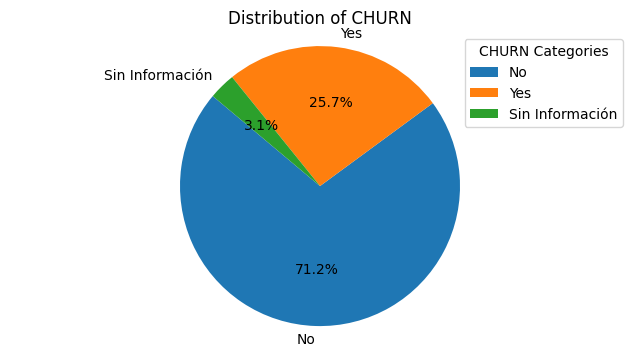

In [97]:
import matplotlib.pyplot as plt

# Calculate the counts of the CHURN column
churn_counts = df_final['CHURN'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of CHURN')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [101]:
df_bajas=df_final[df_final['CHURN']=='Yes']
#df_bajas.head()

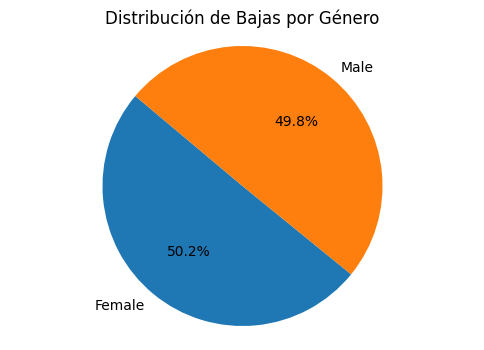

In [103]:
# prompt: graficar en pie el data frame de bajas por genero

import matplotlib.pyplot as plt
# Filtrar el DataFrame para obtener solo las filas donde 'CHURN' es 'Yes'
df_bajas = df_final[df_final['CHURN'] == 'Yes']

# Contar la cantidad de cada género en el DataFrame filtrado
bajas_por_genero = df_bajas['GENERO_CLIENTE'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 4))
plt.pie(bajas_por_genero, labels=bajas_por_genero.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Bajas por Género')
plt.axis('equal')  # Asegura que el gráfico de pastel sea circular.
plt.show()

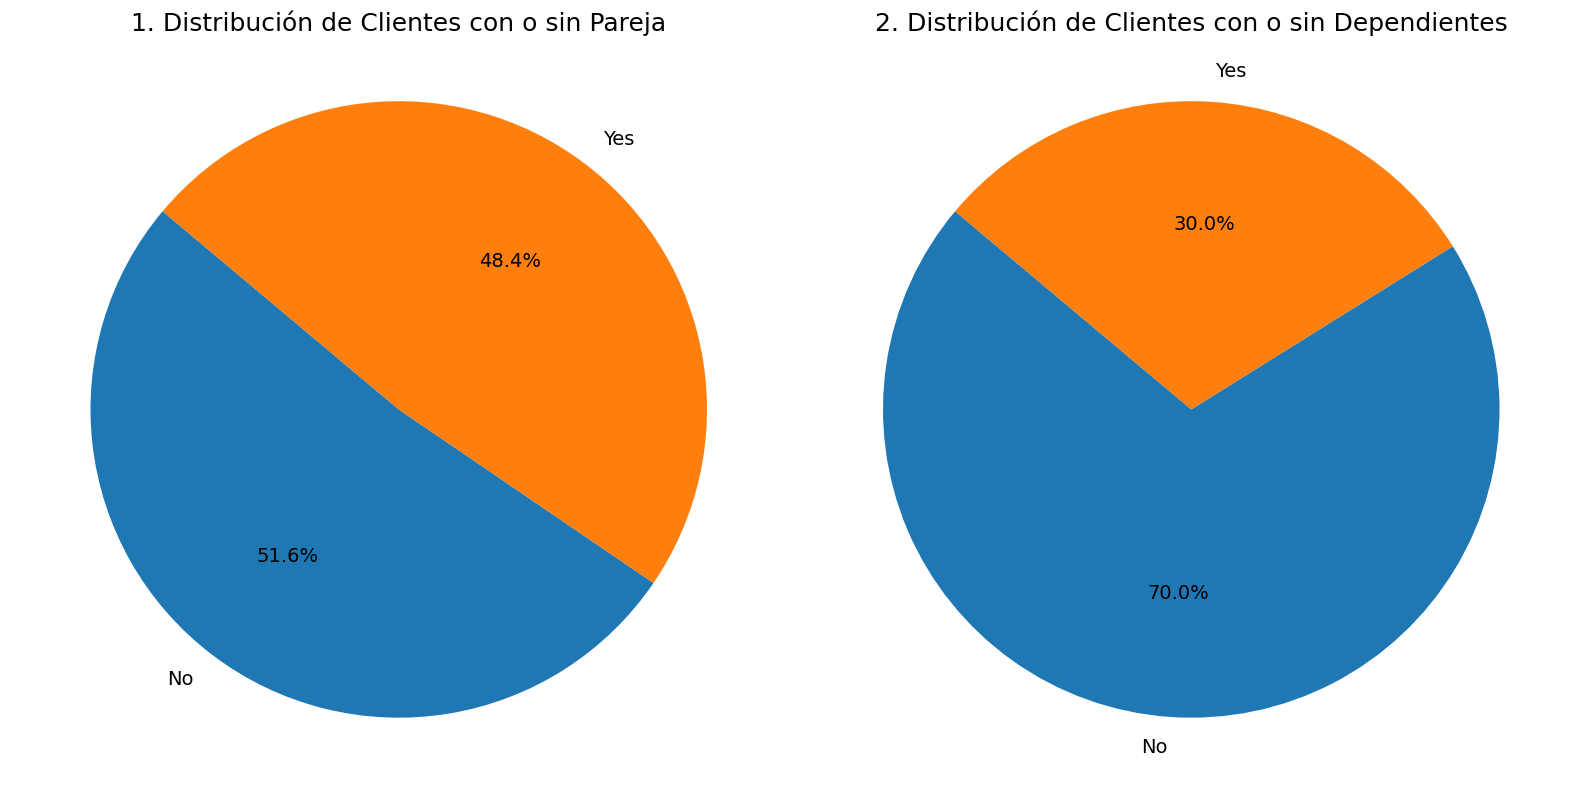

In [120]:
import matplotlib.pyplot as plt

# Calculate the counts for 'CON_PAREJA'
partner_counts = df_final['CON_PAREJA'].value_counts()

# Calculate the counts for 'CLIENTE_CON_DEPENDIENTE'
dependents_counts = df_final['CLIENTE_CON_DEPENDIENTE'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Increased figure height for better readability

# Create the first pie chart for 'CON_PAREJA' in the first subplot
wedges1, texts1, autotexts1 = axes[0].pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'black'})
axes[0].set_title('1. Distribución de Clientes con o sin Pareja', fontsize=18, color='black')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create the second pie chart for 'CLIENTE_CON_DEPENDIENTE' in the second subplot
wedges2, texts2, autotexts2 = axes[1].pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'color': 'black'})
axes[1].set_title('2. Distribución de Clientes con o sin Dependientes', fontsize=18, color='black')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Increase font size and set color for the percentage labels
for autotext in autotexts1:
    autotext.set_fontsize(14)
    autotext.set_color('black')
for autotext in autotexts2:
    autotext.set_fontsize(14)
    autotext.set_color('black')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

#📄Informe final